# Suicide_Rate_Analysis

This compiled [dataset](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016) pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

Statistics about suicide are not easy to collect, and may be inaccurate due to the sensitivity of the issue. However, lets try to present the analysis on world suicide data from 1985 to 2016. The following features are present in the dataset we got:

- country: name of the countries
- year: year for the suicides recorded
- sex: gender
- age: age groups
- suicides_no: number of suicides for the mentioned age groupes
- population: number of individuals in the corresponding age groups
- suicides/100k pop-number of suicides per 100k population
- country-year: column combining data in columns "country" and "year"
- HDI for year: The Human Development Index for given year (a statistic composite index of life expectancy, education, and per capita income indicators)
- gdp_for_year: GDP (a monetary measure of all market values of all the goods and services produced in certain period of time)
- gdp_per_capita: GDP per person (obtained by dividing its GDP for a particular period by its average population for the year)
- generation: generation for each group

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [4]:
data = pd.read_csv("Dataset/master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
# column contains the combined data in columns "country" and "year", hence dropping the same.

file = data.copy()

file.drop('country-year', axis = 1, inplace = True)
file.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


## Data insights

### summary of descriptive statistics

In [6]:
file.describe(include = "all")

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,NaN,2321,NaN,6
top,Mauritius,NaN,male,15-24 years,NaN,NaN,NaN,NaN,"2,156,624,900",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,0.855000,NaN,24874.000000,NaN


In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


Making the changes in feature names and the dtypes

In [9]:
file[" gdp_for_year ($) "] = file[" gdp_for_year ($) "].str.replace(',' , '')
file['GDP for year'] = file[' gdp_for_year ($) '].astype("int64")
file['GDP per capita'] = file['gdp_per_capita ($)'].astype("int64")

file.drop([' gdp_for_year ($) ', 'gdp_per_capita ($)'], axis = 1, inplace = True)
file[["country", "sex", "generation", "age"]] = file[["country", "sex", "generation", "age"]].apply(lambda x: x.astype('category'))
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            27820 non-null  category
 1   year               27820 non-null  int64   
 2   sex                27820 non-null  category
 3   age                27820 non-null  category
 4   suicides_no        27820 non-null  int64   
 5   population         27820 non-null  int64   
 6   suicides/100k pop  27820 non-null  float64 
 7   HDI for year       8364 non-null   float64 
 8   generation         27820 non-null  category
 9   GDP for year       27820 non-null  int64   
 10  GDP per capita     27820 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 1.6 MB


In [10]:
file.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,generation,GDP for year,GDP per capita
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,Generation X,2156624900,796
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,Silent,2156624900,796
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,Generation X,2156624900,796
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,G.I. Generation,2156624900,796
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,Boomers,2156624900,796


Next we can see the distribution of suicides in each generation. The distribution is presented for the total number of suicides and number of suicides per 100k population

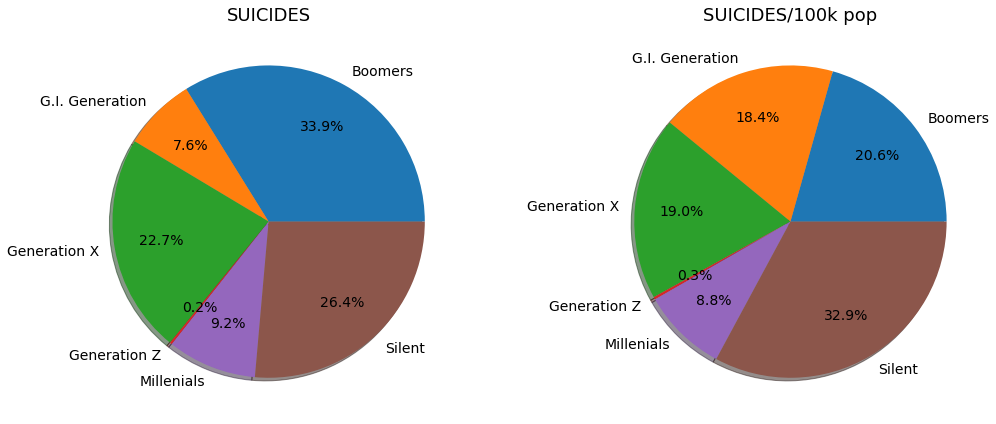

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

grouped_gen1=file.groupby("generation")['suicides_no'].sum()
x1=grouped_gen1.index.tolist()
y1=grouped_gen1.values.tolist()
ax1.pie(y1,labels=x1, autopct='%1.1f%%', shadow=True, pctdistance=0.7, textprops={'fontsize': 14})
ax1.set_title("SUICIDES", fontsize=18, color='k')
grouped_gen2=file.groupby("generation")['suicides/100k pop'].sum()
x2=grouped_gen2.index.tolist()
y2=grouped_gen2.values.tolist()
ax2.pie(y2,labels=x2, autopct='%1.1f%%', shadow=True, pctdistance=0.7, textprops={'fontsize': 14})
ax2.set_title("SUICIDES/100k pop", fontsize=18, color='k')
plt.tight_layout()
plt.draw()

Lets see a rough distribution of each feature in our data.

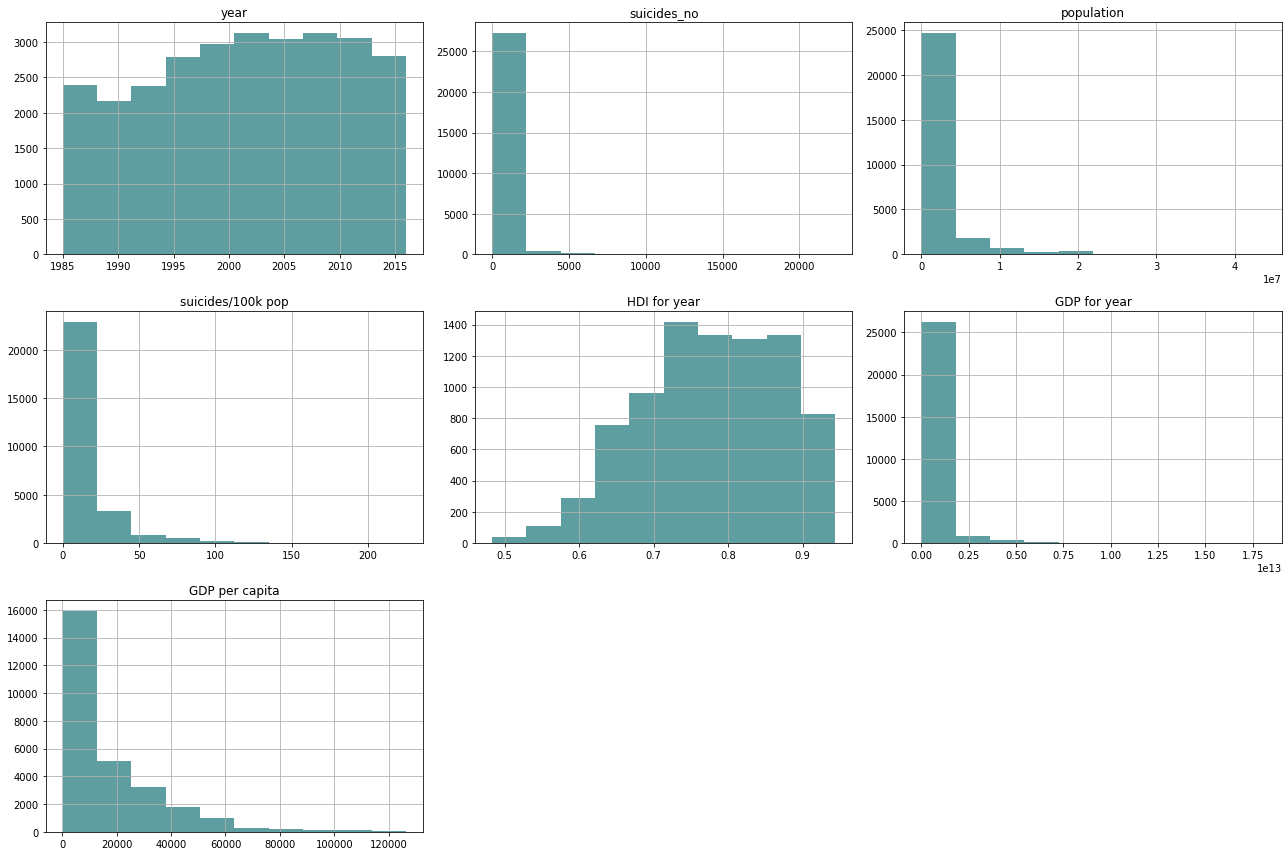

In [12]:
file.hist(bins=10, color="cadetblue")
plt.tight_layout(rect=(0, 0, 3, 3)) 

Distribution of Population

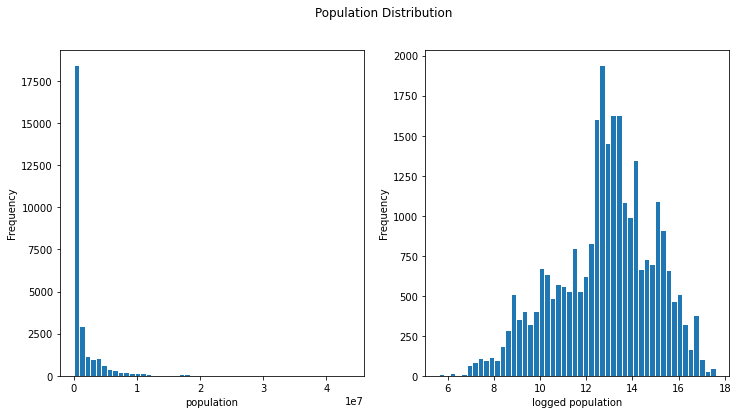

In [13]:
ax1=plt.subplot(1,2,1)
file['population'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("population")

ax2=plt.subplot(1,2,2)
np.log(file["population"]).plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax2.set_xlabel("logged population")
plt.suptitle("Population Distribution")
plt.show()

Distribution of Yearly GDP

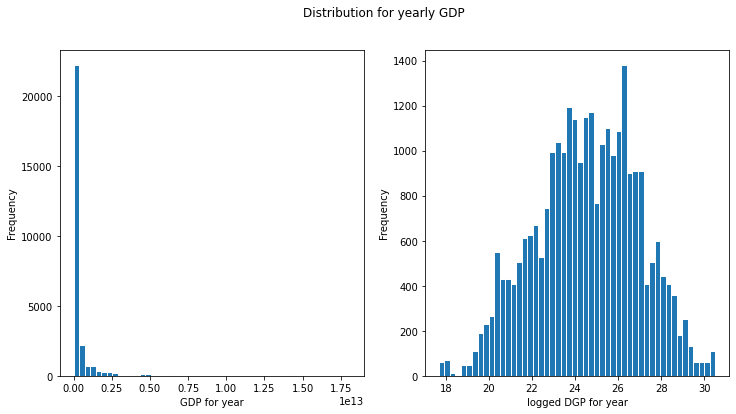

In [ ]:
ax1=plt.subplot(1,2,1)
file['GDP for year'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("GDP for year")

ax2=plt.subplot(1,2,2)
np.log(file["GDP for year"]).plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax2.set_xlabel("logged DGP for year")
plt.suptitle("Distribution for yearly GDP")
plt.show()

Suicide distribution in Gender and Age groups

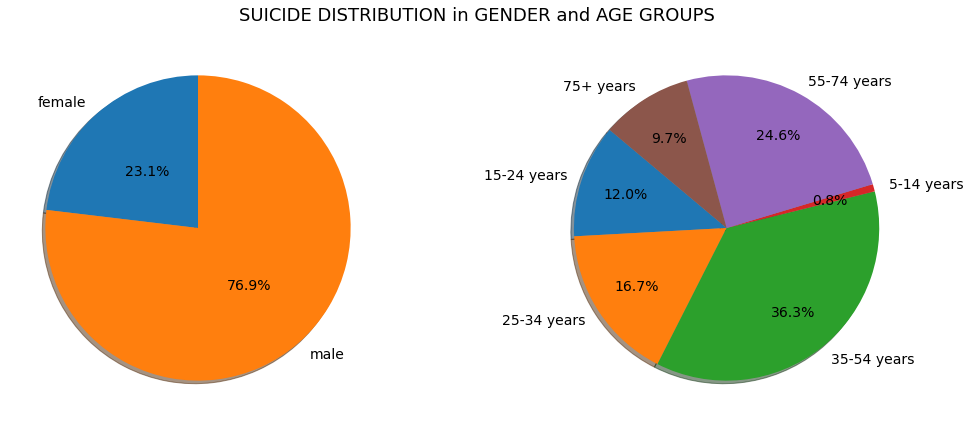

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6))
grouped_sex = file.groupby("sex")['suicides_no'].sum()
x = grouped_sex.index.tolist()
y = grouped_sex.values.tolist()
ax1.pie(y,labels=x, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance=0.5, textprops={'fontsize': 14})
grouped_age = file.groupby("age")['suicides_no'].sum()
x = grouped_age.index.tolist()
y = grouped_age.values.tolist()
ax2.pie(y,labels=x, autopct='%1.1f%%', shadow=True, startangle=140, pctdistance=0.7, textprops={'fontsize': 14})
f.suptitle("SUICIDE DISTRIBUTION in GENDER and AGE GROUPS", fontsize=18, color = 'k')
f.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

total number of suicides in the listed countries for 1985-2016

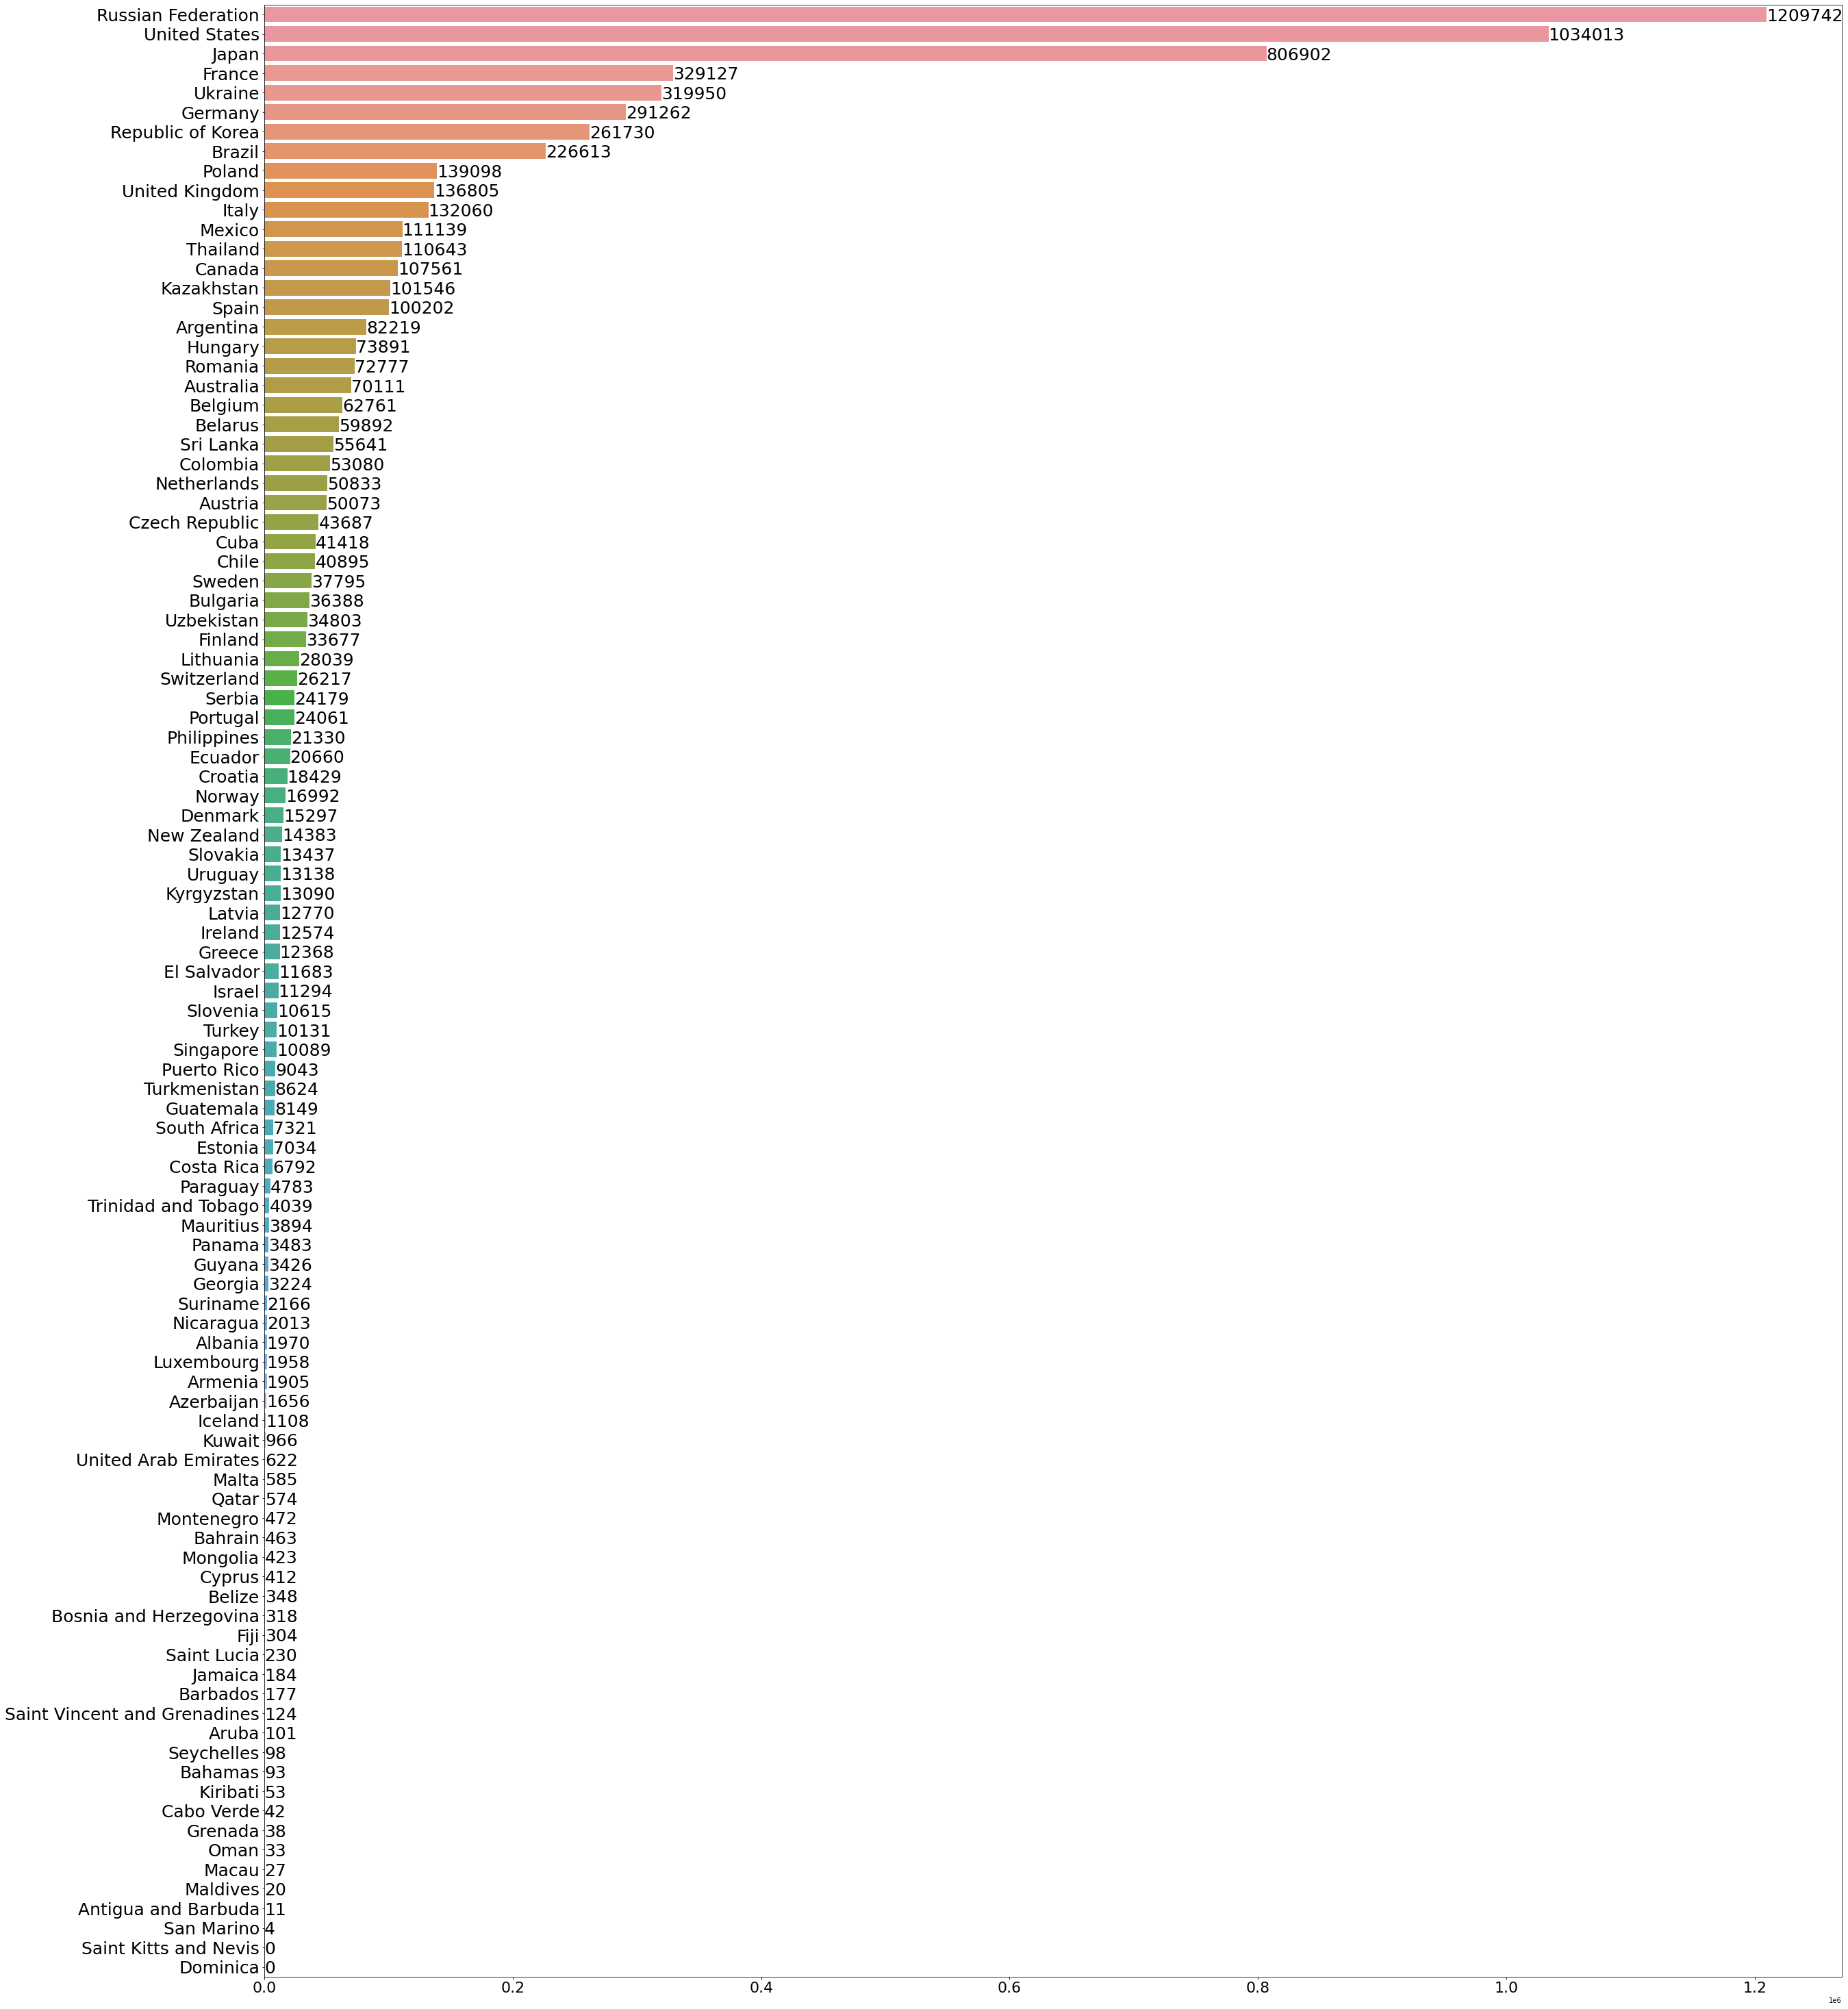

In [17]:
total_suicides = file.groupby("country")["suicides_no"].sum()
total_suicides_df = pd.DataFrame(total_suicides).sort_values(by = "suicides_no", ascending = False)
ind_list = list(total_suicides_df.index)
plt.figure(figsize=(10,40))
plt.subplots_adjust(left=-7, bottom=0.05, right=-3.8, top=1.05, wspace=-0.5, hspace=0.05)
ax=sns.barplot(y=ind_list, x=total_suicides_df.iloc[:,0].values, data=total_suicides_df, ci=None)
plt.xticks(fontsize=22)
plt.yticks(fontsize=25)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+.6*p.get_height(),'{:.0f}'.format(width), ha='left', va='center', fontsize=25)

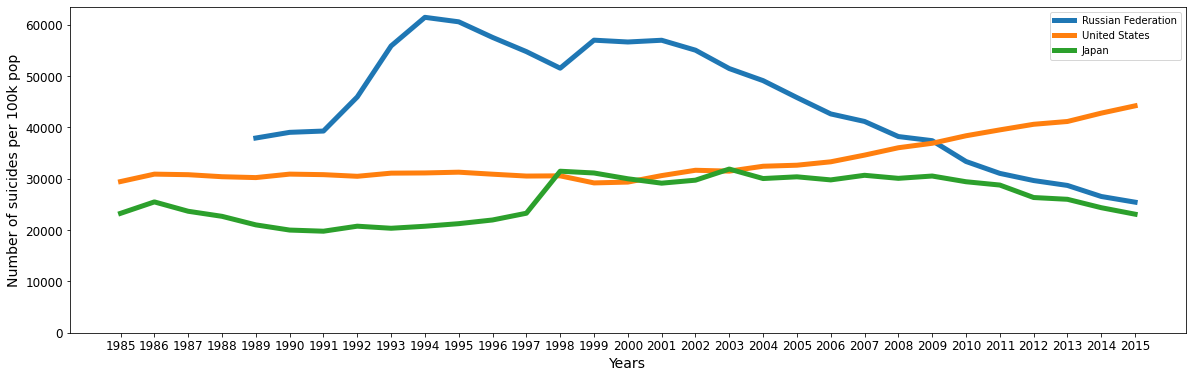

In [18]:
plt.figure(figsize=(20,6))
for c in ("Russian Federation", "United States", "Japan"):
    file_c=file[file['country']==c]
    file_c_grouped=file_c.groupby("year")[["suicides_no"]].sum()
    x=file_c_grouped.index.tolist()
    y=file_c_grouped["suicides_no"]
    plt.plot(x,y, linewidth=5, label=c)
    plt.yticks(np.arange(0,65000, step=10000), fontsize=12)
    plt.xticks(np.arange(1985,2016, step=1), fontsize=12)
    plt.xlabel("Years",fontsize=14)
    plt.ylabel("Number of suicides per 100k pop", fontsize=14)
plt.legend()
plt.show()